# Decision Tree for classification with CART

In [1]:
# Imports
import numpy as np
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
train = pd.read_csv('/Users/Valina/Documents/DataScience/Kaggle/Titanic/train.csv')
test = pd.read_csv('/Users/Valina/Documents/DataScience/Kaggle/Titanic/test.csv')
# Creating a copy of original dataset and store test passenger id
original_train = train.copy()
PassengerId = test['PassengerId']

In [226]:
# Showing overview of the train dataset
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,1,1
5,6,0,3,"Moran, Mr. James",male,18,0,0,330877,8.4583,NaN,Q,0,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,1,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,0,5,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,0,3,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,0,2,0


In [2]:
# Performing feature engineering
# Adding binary feature "does passenger have cabin"
train['Has_Cabin'] = train['Cabin'].apply(lambda x: 0 if type(x)==float else 1)
test['Has_cabin'] = test['Cabin'].apply(lambda x: 0 if type(x)==float else 1)

full_data = [train, test]

# Creating new feature FamilySiye from Siblings/Spouse and Parents/Children
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] +1

# Creating new feature IsAlone from FamilySize
for dataset in full_data:
    dataset['IsAlone'] = dataset['FamilySize'].apply(lambda x: 1 if x==1 else 0)
    

# Filling Embarked and Fare columns with values where NaN
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
    

    
    
# Remove all NULLS from the Age column
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    # Next line has been improved to avoid warning
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

In [4]:
# another way to do it
for dataset in full_data:
    dataset['IsAlone2'] = 0
    dataset.loc[dataset['FamilySize']==1, 'IsAlone2'] =1
    
print(train.loc[train['IsAlone'] != train['IsAlone2']])

for dataset in full_data:
    dataset.drop(['IsAlone2'], axis=1, inplace=True)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Has_Cabin, FamilySize, IsAlone, IsAlone2]
Index: []


In [3]:
def get_title(name):
    #print(name)
    title_search = re.search('([A-Za-z]+)\.', name)
    print(title_search)
    if title_search:
        return title_search.group(1)
    return ""

In [ ]:
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

# Group all non-common titles into one single grouping "Rare"
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [5]:
for dataset in full_data:
    dataset['Sex'] = dataset['Sex'].map({'female':0, 'male':1}).astype(int)

In [6]:
title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
for dataset in full_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [7]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [8]:
for dataset in full_data:
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] ;

In [9]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
for dataset in full_data:
    dataset = dataset.drop(drop_elements, axis=1, inplace=True)

In [10]:
train.head(15)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,0,2,0,3,1,1,2,0,3
2,1,3,0,1,0,1,0,0,1,1,4
3,1,1,0,2,0,3,0,1,2,0,3
4,0,3,1,2,0,1,0,0,1,1,1
5,0,3,1,2,0,1,2,0,1,1,1
6,0,1,1,3,0,3,0,1,1,1,1
7,0,3,1,0,1,2,0,0,5,0,2
8,1,3,0,1,2,1,0,0,3,0,3
9,1,2,0,0,0,2,1,0,2,0,3


###### This is how we have cleaned the data:
 - we have replaced the Cabin feature with the binary feature Has_Cabin thus removing nulls
 - we have filled the nulls in the Age feature with integers drawn by a uniform distribution within current [Age-mean +- Age-std) interval
 - We have replaced the nulls in Embarked with the value S
 - We have combined the two features sibling/spouse and parent/children into FamilySize and IsAlone
 - we have replaced all string feature with integers mapping the Sex, the Title, the Fare, the Age and Embarked and then filled the nulls with zeros for Fare and Titles
 
 Our dataset is now much cleaner than before, with only numerical values and potentially meaningful features. Let's now explore the relationship between our variables by plotting the Pearson Correlation between all the attributes in our dataset (credit to Anisotropic for this beautiful plot):
 

### Relationship between input features

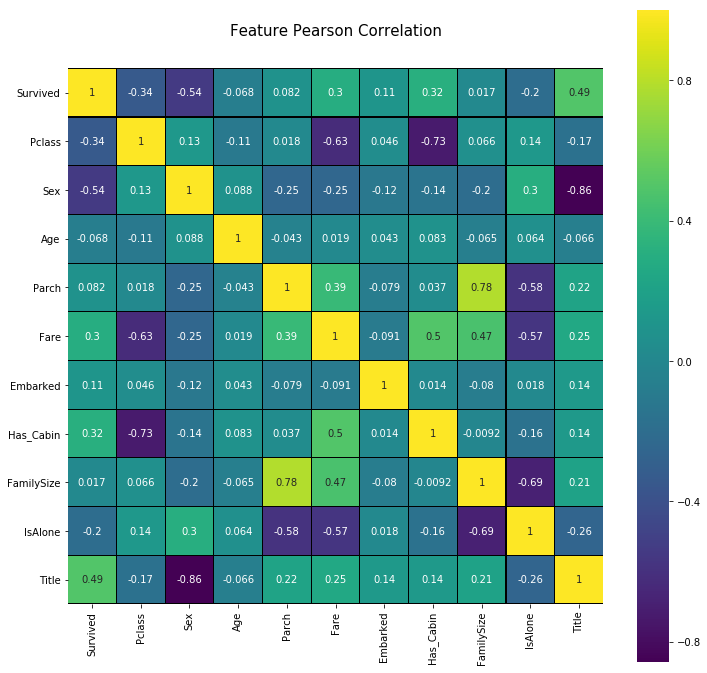

In [15]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Feature Pearson Correlation', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(), linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='black', annot=True)


Sex and Title show the highest correlations (in absolute terms) with the class (Survived): 0.54 and 0.49 respectively. But the absolute correlation between both is also very high (0.86, the highest in our dataset), so they are probably carrying the same information and using the two as inputs for the same model wouldn't be a good idea. 

In [17]:
# Show simple statistics for Survived with respect to Title
train[['Title','Survived']].groupby(['Title'], as_index=False).agg(['mean','count','sum'])


Survived           
           mean count  sum
Title                     
1      0.156673   517   81
2      0.575000    40   23
3      0.793651   126  100
4      0.702703   185  130
5      0.347826    23    8

In [18]:
# Show simple statistics for Survived with respect to Sex
train[['Sex','Survived']].groupby(['Sex'], as_index=False).agg(['mean','count','sum'])

Survived           
         mean count  sum
Sex                     
0    0.742038   314  233
1    0.188908   577  109

In [ ]:
# Investigate Sex and Title relastionship further
title_and_sex = original_train.copy()[['Name','Sex']]
title_and_sex['Title'] = title_and_sex['Name'].apply(get_title)
title_and_sex['Sex'] = title_and_sex['Sex'].map({'male':1, 'female':0}).astype(int)
title_and_sex.head(10)
title_and_sex[['Sex','Title']].groupby(['Title']).agg(['mean','count','sum'])

Apart from one female Dr, the Title contains the information about the gender but with more segmentation (15% of Mr survived but 57% of master). So a first split of the decision tree for Title would make a second split for Sex meaningless.

### Gini Impurity

Decision Trees are an ordered sequence of splits. To find which the best splits and their best ordering are we have to apply some algorithm that builds the most performing tree based on a metric. The most common algorithm are Information Gain and the Gini Impurity. The scikit_learn package implemets both. Let's first look at the Gini Impurity.

In [12]:
def get_gini_impurity(n_survived, n_total):
    prob_survival = n_survived/n_total
    prod_death = 1 - prob_survival
    gini_impurity = 1 - prob_survival*prob_survival - prod_death*prod_death
    return gini_impurity

In [13]:
get_gini_impurity(train['Survived'].sum(), len(train['Survived'].index))

0.47301295786144276

In [14]:
survived_men = train.loc[train['Sex']==1,['Survived']].sum()
total_men = train.loc[train['Sex']==1, 'Survived'].count()
men_fraction = len(train[train['Sex']==1]) / len(train.index)

survived_women = train.loc[train['Sex']==0,['Survived']].sum()
total_women = train.loc[train['Sex']==0, 'Survived'].count()
women_fraction = len(train[train['Sex']==0]) / len(train.index)

# How much does a split over gender reduce the total gini impuruty of the dataset?

total_gini_impurity = get_gini_impurity(train['Survived'].sum(), len(train.index))
delta_gini = get_gini_impurity(survived_men, total_men)*men_fraction + get_gini_impurity(survived_women,total_women)*women_fraction
print(delta_gini - total_gini_impurity)

Survived   -0.139648
dtype: float64


In [15]:
survived_title1 = train.loc[train['Title']==1,['Survived']].sum()
total_title1 = train.loc[train['Title']==1, 'Survived'].count()
title1_fraction = len(train[train['Title']==1]) / len(train.index)

survived_title2 = train.loc[train['Title']==2,['Survived']].sum()
total_title2 = train.loc[train['Title']==2, 'Survived'].count()
title2_fraction = len(train[train['Title']==2]) / len(train.index)

survived_title3 = train.loc[train['Title']==3,['Survived']].sum()
total_title3 = train.loc[train['Title']==3, 'Survived'].count()
title3_fraction = len(train[train['Title']==3]) / len(train.index)

survived_title4 = train.loc[train['Title']==4,['Survived']].sum()
total_title4 = train.loc[train['Title']==4, 'Survived'].count()
title4_fraction = len(train[train['Title']==4]) / len(train.index)

survived_title5 = train.loc[train['Title']==5,['Survived']].sum()
total_title5 = train.loc[train['Title']==5, 'Survived'].count()
title5_fraction = len(train[train['Title']==5]) / len(train.index)

delta_gini = get_gini_impurity(survived_title1, total_title1)*title1_fraction + get_gini_impurity(survived_title2,total_title2)*title2_fraction + get_gini_impurity(survived_title3,total_title3)*title3_fraction + get_gini_impurity(survived_title4,total_title4)*title4_fraction + get_gini_impurity(survived_title5,total_title5)*title5_fraction
            
print(delta_gini - total_gini_impurity)



Survived   -0.152956
dtype: float64


In [74]:
survived_titleNOT1 = train.loc[train['Title']>1,['Survived']].sum()
total_titleNOT1 = train.loc[train['Title']>1, 'Survived'].count()
titleNOT1_fraction = len(train[train['Title']>1]) / len(train.index)

delta_gini = get_gini_impurity(survived_title1, total_title1)*title1_fraction + get_gini_impurity(survived_titleNOT1,total_titleNOT1)*titleNOT1_fraction
print(delta_gini - total_gini_impurity)


Survived   -0.14267
dtype: float64





A split over the Title feature reduces the Gini impurity more than a split over Gender. Since Title had after Sex the highest correlation with the Feature Survived this is probably going to be the first split in the decision tree.

In [16]:
from sklearn.model_selection import KFold
from sklearn import tree

##### Cross Validation to determine best tree depth

With ten features we can have a maximum of ten splits. But what value performs the best?
We calculate the average accuracy for all possible split values.

With KFold we tell scikitlearn that we want to test our tree model on 10 different subsets of the train dataset.
For each depth level we then create a tree model. Then we loop over these 10 different subsets of the train dataset.
For each subset we fit the model and evaluate the accuracy.
So for each depth level we evaluate the accuracy on 10 randomly selected subsets of the trainig set. We than take the average of these accuracies saving the final average accuracy for the current depth level.

In [17]:
cv = KFold(n_splits=10) # shuffle=False (default), random_state=<seed>: whether to shuffle the data with this seed 
                        # before splitting into batches
accuracies = list()
max_attributes = len(list(test))
depth_range = range(1, max_attributes + 1)

for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth=depth)
    
    for train_fold, valid_fold in cv.split(train):
        f_train = train.loc[train_fold]
        f_valid = train.loc[valid_fold]
        #print(f_train.drop(['Survived'], axis=1).head())
        #print(f_train.head(1))
        
        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1),
                              y = f_train['Survived'])
        
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1),
                             y = f_valid['Survived'])
        
        fold_accuracy.append(valid_acc)
        
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
 


df = pd.DataFrame({'Max Depth': depth_range, 'Average Accuracy':accuracies})
df = df[['Max Depth', 'Average Accuracy']]
print(df.to_string(index=False))

Max Depth  Average Accuracy
        1          0.782285
        2          0.799189
        3          0.828277
        4          0.819288
        5          0.817066
        6          0.809263
        7          0.811473
        8          0.809288
        9          0.819351
       10          0.819351


We see that the model with the highest accuracy has a depth of 3, 4 or 5 splits depending on the values of the KFold parameters random_state and shuffle.

### Final decision Tree

In [65]:
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as PImage

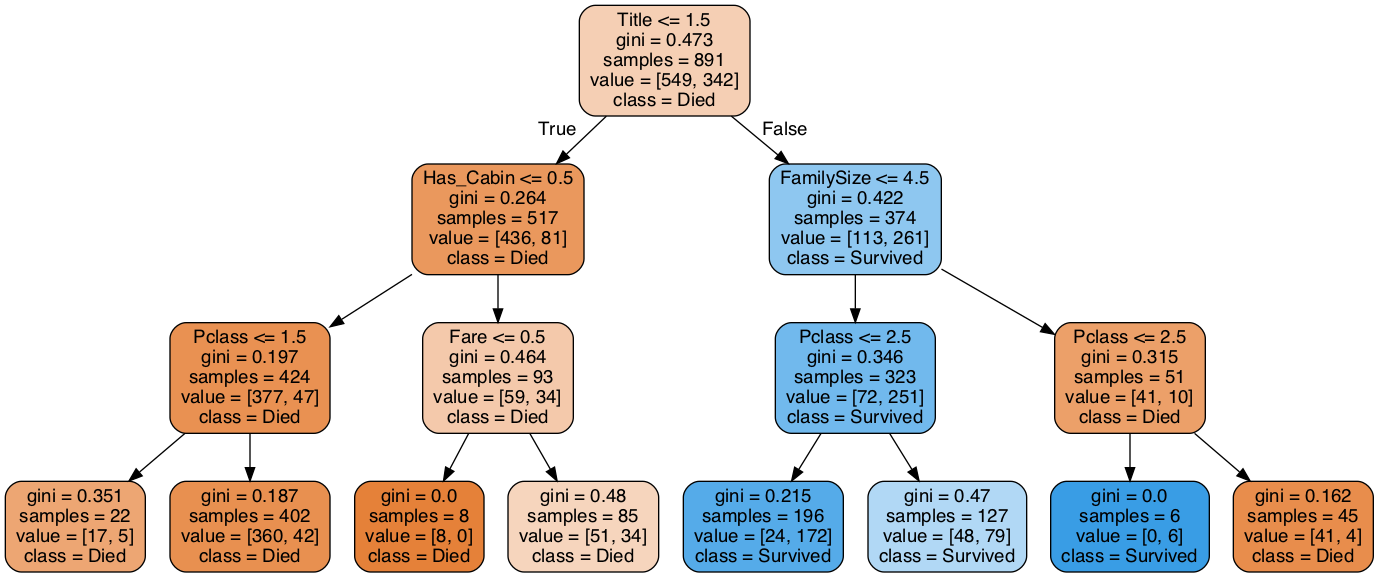

In [73]:
## Preparing input for model
# Creating target dataframe
y_train = train['Survived']

# Creating numpy arrays or train and test datasets.
x_train = train.drop(['Survived'], axis=1).values
x_test = test.values

## Create model with best depth
decision_tree = tree.DecisionTreeClassifier(max_depth=3)
decision_tree.fit(x_train,y_train)

## Predicting results on test set
y_pred = decision_tree.predict(x_test)
submission = pd.DataFrame({'PassengerId':PassengerId, 'Survived':y_pred})

submission.to_csv('submission.csv', index=False)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(train.drop(['Survived'], axis=1)),
                              class_names = ['Died', 'Survived'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','/Users/Valina/Documents/DSML-Projects/decisionTree/tree1.dot','-o','/Users/Valina/Documents/DSML-Projects/decisionTree/tree1.png'])


# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")